In [1]:
import pandas as pd

In [3]:
from google.colab import files
upload_files = files.upload()

Saving olist_products_dataset.csv to olist_products_dataset.csv
Saving olist_orders_dataset.csv to olist_orders_dataset.csv
Saving olist_order_items_dataset.csv to olist_order_items_dataset.csv


In [4]:
# load data
orders = pd.read_csv('olist_orders_dataset.csv')
items = pd.read_csv('olist_order_items_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')

In [5]:
# gabungan..(1) orders dan items
merged_1 = pd.merge(orders, items, on='order_id', how='inner')

# gabungan (1) dan products
final_df = pd.merge(merged_1, products, on='product_id', how='inner')

# hasil
print(final_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08

In [6]:
# daftar kolom yang berisi data tanggal
date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

# ubah tipe data menjadi datetime
for col in date_columns:
    final_df[col] = pd.to_datetime(final_df[col])

# hasil
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  object        
 1   customer_id                    112650 non-null  object        
 2   order_status                   112650 non-null  object        
 3   order_purchase_timestamp       112650 non-null  datetime64[ns]
 4   order_approved_at              112635 non-null  datetime64[ns]
 5   order_delivered_carrier_date   111456 non-null  datetime64[ns]
 6   order_delivered_customer_date  110196 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112650 non-null  datetime64[ns]
 8   order_item_id                  112650 non-null  int64         
 9   product_id                     112650 non-null  object        
 10  seller_id                      112650 non-null  object        
 11  

In [7]:
from google.colab import files
upload_files = files.upload()

#  data terjemahan
translations = pd.read_csv('product_category_name_translation.csv')

# gabungkan ke tabel utama
final_df = pd.merge(final_df, translations, on='product_category_name', how='left')

# hapus kolom bahasa portugis
final_df = final_df.drop(columns=['product_category_name'])

# ganti nama kolom 'product_category_name_english'
final_df = final_df.rename(columns={'product_category_name_english': 'product_category'})

# cek hasil terjemahan
print(final_df[['product_id', 'product_category']].head())

Saving product_category_name_translation.csv to product_category_name_translation.csv
                         product_id product_category
0  87285b34884572647811a353c7ac498a       housewares
1  595fac2a385ac33a80bd5114aec74eb8        perfumery
2  aa4383b373c6aca5d8797843e5594415             auto
3  d0b61bfb1de832b15ba9d266ca96e5b0         pet_shop
4  65266b2da20d04dbe00c5c2d3bb7859e       stationery


In [8]:
# selisih hari delivery 'delivery_days'
final_df['delivery_days'] = (final_df['order_delivered_customer_date'] - final_df['order_purchase_timestamp']).dt.days

# menghitung pengiriman telat atau tidak
final_df['delay_days'] = (final_df['order_delivered_customer_date'] - final_df['order_estimated_delivery_date']).dt.days

# jika delay_days > 0 berarti 'late', kalau <= 0 berarti 'on time'
final_df['delivery_status'] = final_df['delay_days'].apply(lambda x: 'Late' if x > 0 else 'On Time')

# hasil
print(final_df[['order_id', 'delivery_days', 'delivery_status']].head())

                           order_id  delivery_days delivery_status
0  e481f51cbdc54678b7cc49136f2d6af7            8.0         On Time
1  53cdb2fc8bc7dce0b6741e2150273451           13.0         On Time
2  47770eb9100c2d0c44946d9cf07ec65d            9.0         On Time
3  949d5b44dbf5de918fe9c16f97b45f8a           13.0         On Time
4  ad21c59c0840e6cb83a9ceb5573f8159            2.0         On Time


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# mengelompokkan data berdasarkan kategori produk
product_analysis = final_df.groupby('product_category').agg({
    'price': 'sum',
    'order_id': 'count'
}).reset_index()

# mengganti nama kolom
product_analysis.columns = ['product_category', 'total_revenue', 'total_orders']

# mengurutkan berdasarkan revenue tertinggi
top_products_revenue = product_analysis.sort_values(by='total_revenue', ascending=False).head(10)

print("Top 10 Produk Berdasarkan Pendapatan:")
print(top_products_revenue)

Top 10 Produk Berdasarkan Pendapatan:
         product_category  total_revenue  total_orders
43          health_beauty     1258681.34          9670
70          watches_gifts     1205005.68          5991
7          bed_bath_table     1036988.68         11115
65         sports_leisure      988048.97          8641
15  computers_accessories      911954.32          7827
39        furniture_decor      729762.49          8334
20             cool_stuff      635290.85          3796
49             housewares      632248.66          6964
5                    auto      592720.11          4235
42           garden_tools      485256.46          4347


/tmp/ipython-input-1614917015.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='product_category', data=top_products_revenue, ax=ax[0], palette='viridis')
/tmp/ipython-input-1614917015.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_orders', y='product_category', data=top_products_orders, ax=ax[1], palette='magma')


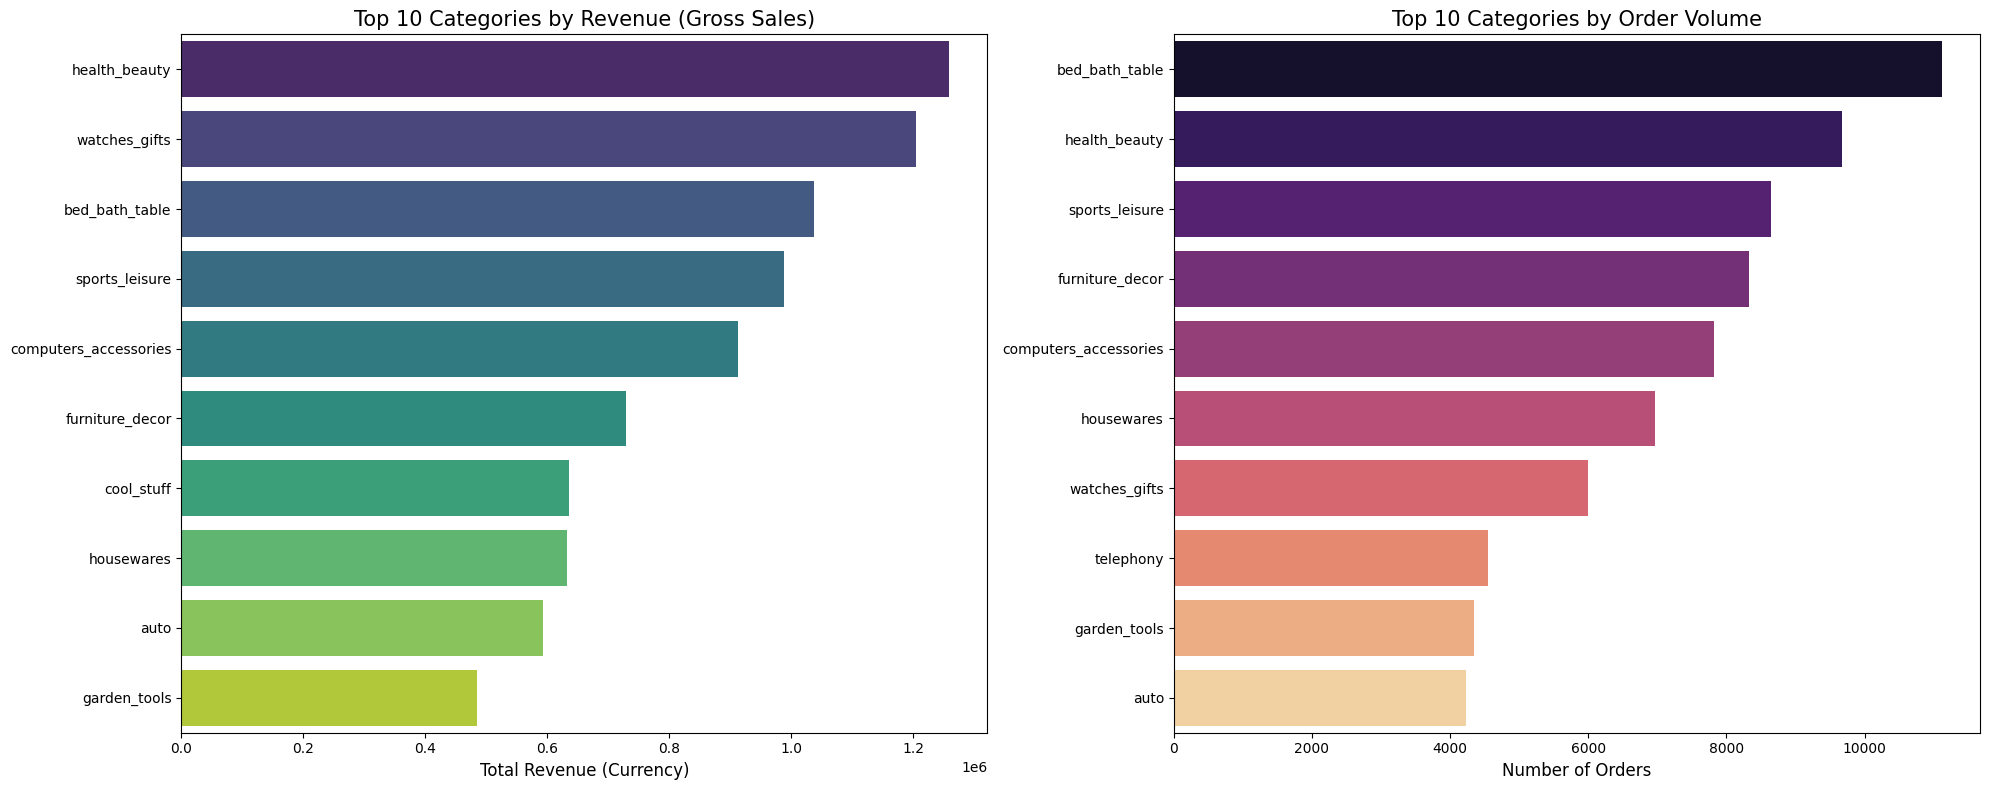

In [10]:
# Setup canvas gambar (2 grafik berdampingan)
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Grafik 1: Top 10 Berdasarkan Revenue (Uang)
sns.barplot(x='total_revenue', y='product_category', data=top_products_revenue, ax=ax[0], palette='viridis')
ax[0].set_title('Top 10 Categories by Revenue (Gross Sales)', fontsize=15)
ax[0].set_xlabel('Total Revenue (Currency)', fontsize=12)
ax[0].set_ylabel('')

# Kita buat data baru untuk Top 10 by Orders (Jumlah)
top_products_orders = product_analysis.sort_values(by='total_orders', ascending=False).head(10)

# Grafik 2: Top 10 Berdasarkan Orders (Volume)
sns.barplot(x='total_orders', y='product_category', data=top_products_orders, ax=ax[1], palette='magma')
ax[1].set_title('Top 10 Categories by Order Volume', fontsize=15)
ax[1].set_xlabel('Number of Orders', fontsize=12)
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

In [11]:
from google.colab import files
upload_files = files.upload()

# 1. Load Data Review
reviews = pd.read_csv('olist_order_reviews_dataset.csv')

# Ambil kolom yang penting saja biar hemat memori
reviews = reviews[['order_id', 'review_score', 'review_comment_message']]

# 2. Gabungkan ke tabel utama (final_df)
# Kita pakai 'left join' agar order yang tidak ada review-nya tetap tersimpan
df_complete = pd.merge(final_df, reviews, on='order_id', how='left')

# Cek apakah kolom review_score sudah masuk
print(df_complete[['product_category', 'review_score']].head())

Saving olist_order_reviews_dataset.csv to olist_order_reviews_dataset.csv
  product_category  review_score
0       housewares           4.0
1        perfumery           4.0
2             auto           5.0
3         pet_shop           5.0
4       stationery           5.0


In [12]:
# Ambil daftar nama 10 kategori terlaris dari langkah sebelumnya
top_categories = top_products_orders['product_category'].tolist()

# Filter data hanya untuk 10 kategori ini
df_top_cat = df_complete[df_complete['product_category'].isin(top_categories)]

# Hitung rata-rata rating per kategori
review_analysis = df_top_cat.groupby('product_category')['review_score'].mean().sort_values()

print("Rata-rata Rating untuk Kategori Terlaris (Terendah ke Tertinggi):")
print(review_analysis)

Rata-rata Rating untuk Kategori Terlaris (Terendah ke Tertinggi):
product_category
bed_bath_table           3.895663
furniture_decor          3.903493
computers_accessories    3.930819
telephony                3.946867
watches_gifts            4.019160
garden_tools             4.042735
housewares               4.055019
auto                     4.065512
sports_leisure           4.107986
health_beauty            4.142768
Name: review_score, dtype: float64


/tmp/ipython-input-3954098298.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=review_analysis.values, y=review_analysis.index, palette='RdYlGn')


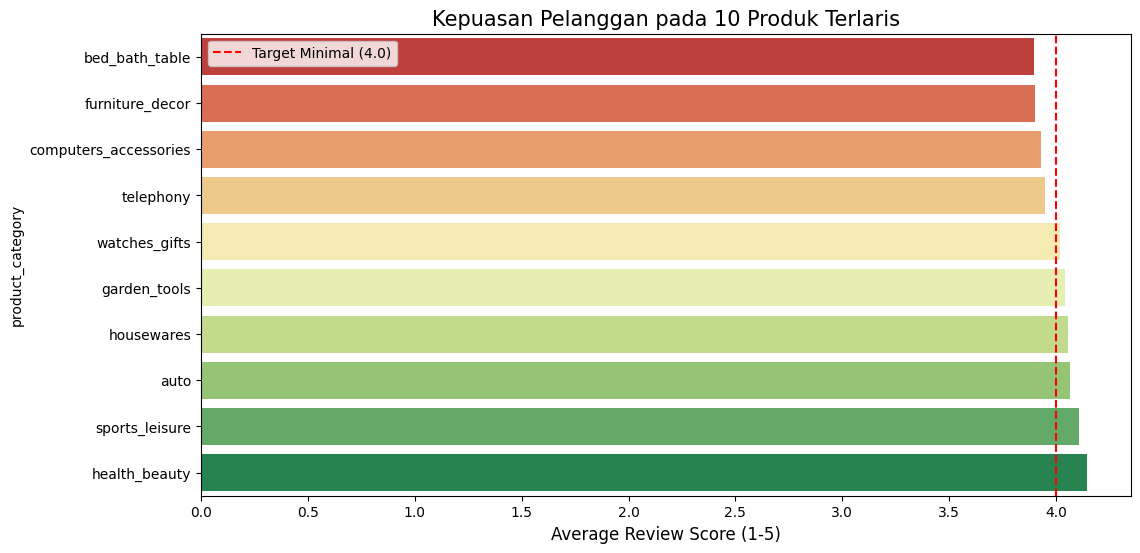

In [13]:
plt.figure(figsize=(12, 6))

# Plot bar chart
sns.barplot(x=review_analysis.values, y=review_analysis.index, palette='RdYlGn')

# Tambahkan garis batas di rating 4.0
plt.axvline(x=4.0, color='red', linestyle='--', label='Target Minimal (4.0)')

plt.title('Kepuasan Pelanggan pada 10 Produk Terlaris', fontsize=15)
plt.xlabel('Average Review Score (1-5)', fontsize=12)
plt.legend()
plt.show()

In [14]:
# 1. Ekstrak Jam dan Hari
final_df['purchase_hour'] = final_df['order_purchase_timestamp'].dt.hour
final_df['purchase_day'] = final_df['order_purchase_timestamp'].dt.day_name()

# 2. Atur urutan hari (Senin - Minggu) agar grafik tidak acak
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
final_df['purchase_day'] = pd.Categorical(final_df['purchase_day'], categories=days_order, ordered=True)

# Cek hasil
print(final_df[['order_id', 'purchase_hour', 'purchase_day']].head())

                           order_id  purchase_hour purchase_day
0  e481f51cbdc54678b7cc49136f2d6af7             10       Monday
1  53cdb2fc8bc7dce0b6741e2150273451             20      Tuesday
2  47770eb9100c2d0c44946d9cf07ec65d              8    Wednesday
3  949d5b44dbf5de918fe9c16f97b45f8a             19     Saturday
4  ad21c59c0840e6cb83a9ceb5573f8159             21      Tuesday


/tmp/ipython-input-1323601401.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_time = final_df.groupby(['purchase_day', 'purchase_hour'])['order_id'].count().unstack()


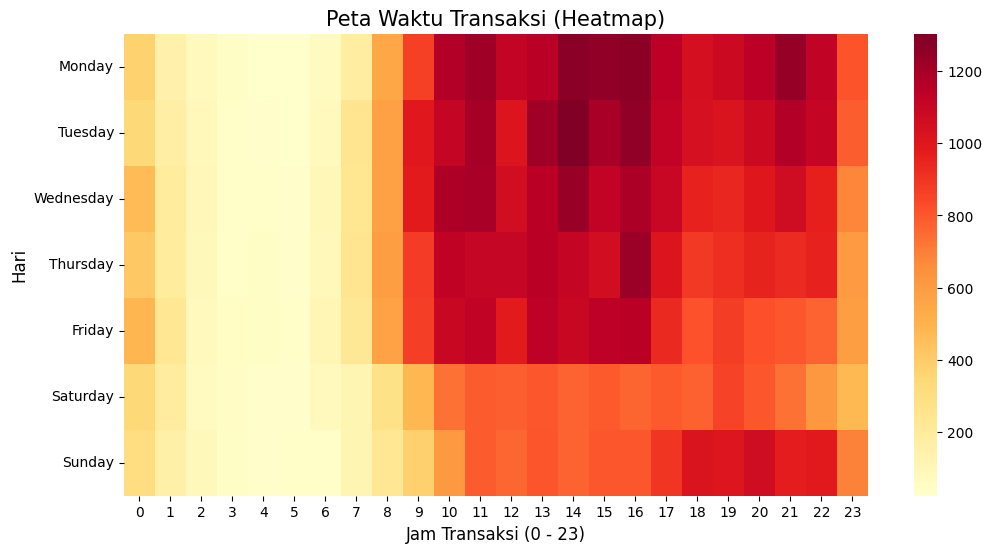

In [15]:
# 1. Buat Pivot Table: Baris = Hari, Kolom = Jam, Isi = Jumlah Order
pivot_time = final_df.groupby(['purchase_day', 'purchase_hour'])['order_id'].count().unstack()

# 2. Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_time, cmap='YlOrRd', annot=False, fmt='d') # cmap='YlOrRd' artinya Kuning ke Merah

plt.title('Peta Waktu Transaksi (Heatmap)', fontsize=15)
plt.xlabel('Jam Transaksi (0 - 23)', fontsize=12)
plt.ylabel('Hari', fontsize=12)
plt.show()

In [16]:
from google.colab import files
upload_files = files.upload()

# 1. Load Data Customer
customers = pd.read_csv('olist_customers_dataset.csv')

# 2. Gabungkan ke data utama (Join via customer_id)
# Ingat: customer_id di tabel orders itu unik per transaksi
df_geo = pd.merge(final_df, customers, on='customer_id', how='left')

# 3. Hitung Total Penjualan & Rata-rata Ongkir per Negara Bagian
geo_analysis = df_geo.groupby('customer_state').agg({
    'order_id': 'count',           # Jumlah Order
    'price': 'sum',                # Total Revenue
    'freight_value': 'mean',       # Rata-rata Ongkir
    'delivery_days': 'mean'        # Rata-rata Lama Kirim
}).reset_index()

# Rename kolom biar cantik di Dashboard
geo_analysis.columns = ['State', 'Total_Orders', 'Total_Revenue', 'Avg_Freight', 'Avg_Delivery_Time']

# Urutkan dari penjualan terbanyak
print(geo_analysis.sort_values(by='Total_Revenue', ascending=False).head())

Saving olist_customers_dataset.csv to olist_customers_dataset.csv
   State  Total_Orders  Total_Revenue  Avg_Freight  Avg_Delivery_Time
25    SP         47449     5202955.05    15.147275           8.259609
18    RJ         14579     1824092.67    20.960924          14.689382
10    MG         13129     1585308.03    20.630167          11.515522
22    RS          6235      750304.02    21.735804          14.708299
17    PR          5740      683083.76    20.531652          11.480793


In [17]:
from google.colab import files
upload_files = files.upload()

# 1. Load Data Payment
payments = pd.read_csv('olist_order_payments_dataset.csv')

# 2. Analisis Jenis Pembayaran (Untuk Donut Chart)
payment_type = payments.groupby('payment_type')['payment_value'].count().reset_index()
payment_type = payment_type.sort_values(by='payment_value', ascending=False)

# 3. Analisis Cicilan (Untuk Bar Chart)
# Kita ingin tahu berapa banyak yang bayar cash (1x) vs nyicil (2x dst)
installments = payments[payments['payment_type'] == 'credit_card'] # Hanya kartu kredit yang bisa nyicil
installments_dist = installments.groupby('payment_installments')['order_id'].count().reset_index()

print("Distribusi Metode Pembayaran:")
print(payment_type)

Saving olist_order_payments_dataset.csv to olist_order_payments_dataset.csv
Distribusi Metode Pembayaran:
  payment_type  payment_value
1  credit_card          76795
0       boleto          19784
4      voucher           5775
2   debit_card           1529
3  not_defined              3


In [18]:
# Simpan data yang sudah bersih dan lengkap (ada nama produk inggris, ada jam, ada lokasi)
# df_geo adalah dataframe paling lengkap karena sudah di-merge dengan customer
df_geo.to_csv('olist_master_clean.csv', index=False)

from google.colab import files
files.download('olist_master_clean.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>